In [2]:
import pandas as pd
from urllib.request import urlretrieve
import os
import matplotlib.pyplot as plt

In [3]:
urls = ['https://www.abs.gov.au/statistics/people/population/regional-population-age-and-sex/2021/32350DS0001_2021.xlsx', \
       'https://www.abs.gov.au/statistics/people/population/deaths-australia/2020/33020DO005_2020.xlsx', \
       'https://www.abs.gov.au/statistics/people/education/schools/2021/Table%2035b%20Counts%20of%20all%20Schools%2C%202010-2021.xlsx']

names = ['age_sex', 'pop_deaths', 'education']

In [4]:
# Setting PATH for downloads

output_relative_dir = '../data/raw/'
if not os.path.exists(output_relative_dir):
    os.makedirs(output_relative_dir)
    
# Creates abs_data folder within raw_data
if not os.path.exists(output_relative_dir + 'abs_data'):
    os.makedirs(output_relative_dir + 'abs_data')
    
abs_output_dir = output_relative_dir + 'abs_data'

In [5]:
# Downloading the .xlsx files

i = 0
for url in urls:
    output_dir = f"{abs_output_dir}/{names[i]}.xlsx"
    print(f'File {i+1} started.')
    urlretrieve(url, output_dir)
    print(f'File {i+1} finished.')
    i += 1

File 1 started.
File 1 finished.
File 2 started.
File 2 finished.
File 3 started.
File 3 finished.


# Data Retrieval:

# ABS - https://www.abs.gov.au/statistics

## Datasets:
- Regional population by age & sex : `age_sex`
- Deaths, Australia : `pop_deaths`
- Schools : `education`

## Reading in pop_deaths -

- `pop_deaths` contains information about the estimated resident population, recorded deaths and standardised death rate across each LGA
- Sheet 2 contains VIC info

In [6]:
df = pd.read_excel('../data/raw/abs_data/pop_deaths.xlsx', sheet_name = 2, skiprows = 4, header = [0,1], nrows = 129)[1:]
df = df.drop([(y, 'Standardised death rate.1') for y in range(2012, 2020)], axis=1)
df = df.drop([(y, 'Standardised death rate') for y in range(2012, 2021)], axis=1)
df.columns = [('LGA Code'), ('LGA Name')] + [','.join([str(c) for c in x]) for x in df.columns[2:]]
df2 = df.melt(id_vars=["LGA Code", "LGA Name"])
df2 = df2.dropna()
df2['value'] = df2.value.astype('int')
df2[['year','var']] = df2['variable'].str.split(',').tolist()
df2 = df2.sort_values('year')

# How to make graph less noisy?

- Could sample 30-50 rows, show 3 visualisations + map 
- Could only select areas (suburbs) of interest
- Could show upper, middle and lower areas + map

In [8]:
df3

,LGA Code,LGA Name,variable,value,year,var
0,20110,Alpine (S),"2012,Estimated resident population",12183,2012,Estimated resident population
78,27630,Yarriambiack (S),"2012,Estimated resident population",7095,2012,Estimated resident population
22,22410,Glenelg (S),"2012,Estimated resident population",19825,2012,Estimated resident population
23,22490,Golden Plains (S),"2012,Estimated resident population",19604,2012,Estimated resident population
24,22620,Greater Bendigo (C),"2012,Estimated resident population",103905,2012,Estimated resident population
...,...,...,...,...,...,...
1445,25430,Mount Alexander (S),"2020,Estimated resident population",20001,2020,Estimated resident population
1446,25490,Moyne (S),"2020,Estimated resident population",17027,2020,Estimated resident population
1447,25620,Murrindindi (S),"2020,Estimated resident population",14661,2020,Estimated resident population
1448,25710,Nillumbik (S),"2020,Estimated resident population",65219,2020,Estimated resident population


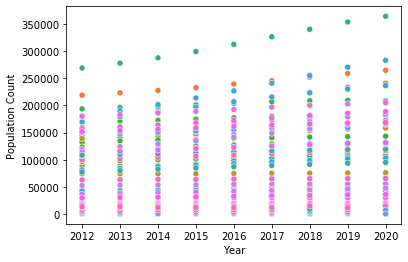

In [82]:
import seaborn as sns

df3 = df2.loc[df2['var'] == 'Estimated resident population']

#sns.scatterplot(data = df3, x='year', y='value', hue='LGA Name')
ax = sns.scatterplot(x = 'year', y = 'value', 
              data = df2, 
              hue = 'LGA Name')
ax.set(xlabel='Year', ylabel='Population Count')
ax.get_legend().remove()
plt.show()

In [34]:
df3

,LGA Code,LGA Name,variable,value,year,var
0,20110,Alpine (S),"2012,Estimated resident population",12183,2012,Estimated resident population
78,27630,Yarriambiack (S),"2012,Estimated resident population",7095,2012,Estimated resident population
22,22410,Glenelg (S),"2012,Estimated resident population",19825,2012,Estimated resident population
23,22490,Golden Plains (S),"2012,Estimated resident population",19604,2012,Estimated resident population
24,22620,Greater Bendigo (C),"2012,Estimated resident population",103905,2012,Estimated resident population
...,...,...,...,...,...,...
1445,25430,Mount Alexander (S),"2020,Estimated resident population",20001,2020,Estimated resident population
1446,25490,Moyne (S),"2020,Estimated resident population",17027,2020,Estimated resident population
1447,25620,Murrindindi (S),"2020,Estimated resident population",14661,2020,Estimated resident population
1448,25710,Nillumbik (S),"2020,Estimated resident population",65219,2020,Estimated resident population


In [12]:
# Forecasting population

forecast = df3.groupby(['LGA Code', 'LGA Name'])['value'].apply(pd.Series.pct_change)

In [18]:
sample = forecast.sample(n = 100)

In [84]:
import numpy as np

In [107]:
avg = sample.mean()
median = sample.median()

[Text(0, 0.5, 'Forecasted Population Growth (%)')]

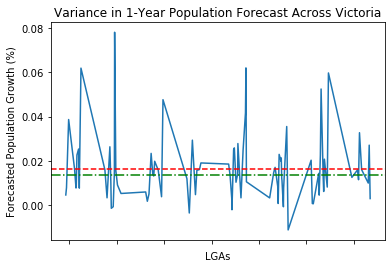

In [110]:
g1 = sns.lineplot(data = sample)
g1.axhline(avg, color = 'red', linestyle = '--')
g1.axhline(median, color = 'green', linestyle = '-.')
g1.set(xticklabels=[])
g1.set(title='Variance in 1-Year Population Forecast Across Victoria')
g1.set(xlabel = 'LGAs')
g1.set(ylabel = 'Forecasted Population Growth (%)')

# DF2 -

### Contains:
- Seperated by LGA
- Data over 9 years [2012 - 2020] for estimated resident population and death count

In [84]:
df2['variable'].unique()

array(['2012,Estimated resident population', '2012,Deaths', '2013,Deaths',
       '2013,Estimated resident population', '2014,Deaths',
       '2014,Estimated resident population', '2015,Deaths',
       '2015,Estimated resident population', '2016,Deaths',
       '2016,Estimated resident population', '2017,Deaths',
       '2017,Estimated resident population', '2018,Deaths',
       '2018,Estimated resident population', '2019,Deaths',
       '2019,Estimated resident population', '2020,Deaths',
       '2020,Estimated resident population'], dtype=object)

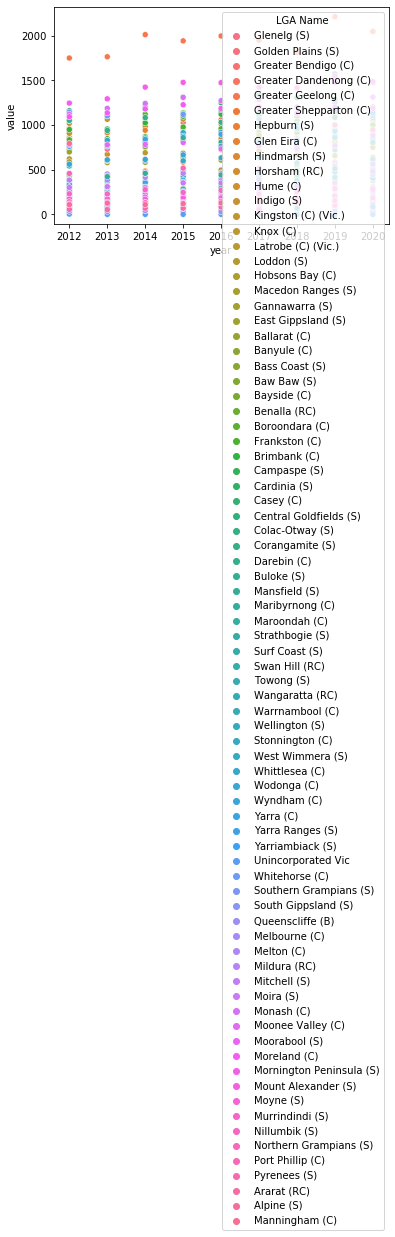

In [85]:
df3 = df2.loc[df2['var'] == 'Deaths']

sns.scatterplot(data = df3, x='year', y='value', hue='LGA Name')

In [86]:
df2.to_csv('../data/curated/abs_data/pop_deaths_lga.csv')

# age_sex (2021) -

- Contains information about the estimated resident population, binned by ages
- 1st sheet males
- 2nd sheet females
- 3rd sheet combined
- Seperated by SA2, not LGA
- Sheets are not seperated by state, so will need to read all of them in and retain only VIC

In [87]:
df = pd.read_excel('../data/raw/abs_data/pop_deaths.xlsx', sheet_name = 2, skiprows = 4, header = [0,1], nrows = 129)[1:]

In [88]:
male_age = pd.read_excel('../data/raw/abs_data/age_sex.xlsx', sheet_name = 1, skiprows = 4, header = [0,1], nrows = 18692)[1:]
female_age = pd.read_excel('../data/raw/abs_data/age_sex.xlsx', sheet_name = 2, skiprows = 4, header = [0,1], nrows = 18692)[1:]
total_age = pd.read_excel('../data/raw/abs_data/age_sex.xlsx', sheet_name = 3, skiprows = 4, header = [0,1], nrows = 18692)[1:]

In [89]:
male_columns = ['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', \
          '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', \
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 and over', 'Total males']

female_columns = ['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', \
          '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', \
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 and over', 'Total females']

total_columns = ['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', \
          '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', \
          '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 and over', 'Total persons']

In [90]:
male_age.columns = male_columns
male_age.drop(male_age.index[[0,1]], inplace = True)
#male_age.dropna(inplace = True)

female_age.columns = female_columns
female_age.drop(female_age.index[[0,1]], inplace = True)
#female_age.dropna(inplace = True)

total_age.columns = total_columns
total_age.drop(total_age.index[[0,1]], inplace = True)
#total_age.dropna(inplace = True)

In [91]:
male_vic = male_age.loc[male_age['S/T name'] == 'Victoria']
female_vic = female_age.loc[female_age['S/T name'] == 'Victoria']
total_vic = total_age.loc[total_age['S/T name'] == 'Victoria']

In [92]:
total_vic.columns

Index(['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code',
       'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code', 'SA2 name', '0-4',
       '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84',
       '85 and over', 'Total persons'],
      dtype='object')

In [93]:
total_vic.head()

,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,...,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and over,Total persons
648,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,...,1142,974,848,709,666,596,419,253,164,16823
649,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,...,818,833,812,822,721,736,526,387,380,12076
650,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,...,532,495,452,526,474,398,204,134,85,7232
651,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011006,Delacombe,...,565,530,538,479,428,432,280,175,228,10640
652,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011007,Smythes Creek,...,326,344,312,311,242,186,95,40,31,4213


In [94]:
# male_vic.to_csv('../data/curated/abs_data/male_vic_pop_sa2.csv')

# education

In [41]:
df = pd.read_excel('../data/raw/abs_data/education.xlsx', sheet_name = 3, skiprows = 4)

In [42]:
vic_education = df.loc[df['State/Territory'] == 'b Vic.']

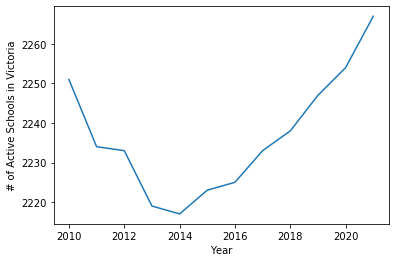

In [43]:
plt.plot(vic_education.groupby('Year')['School Count'].sum())
plt.xlabel('Year')
plt.ylabel('# of Active Schools in Victoria')
plt.show()

In [44]:
vic_education.groupby('Year')['School Count'].sum()

Year
2010    2251.0
2011    2234.0
2012    2233.0
2013    2219.0
2014    2217.0
2015    2223.0
2016    2225.0
2017    2233.0
2018    2238.0
2019    2247.0
2020    2254.0
2021    2267.0
Name: School Count, dtype: float64

In [77]:
vic_education

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),School Type,School Count
12,2021,b Vic.,a Government,a Government,a Primary school,1137.0
13,2021,b Vic.,a Government,a Government,b Secondary school,247.0
14,2021,b Vic.,a Government,a Government,c Combined school,82.0
15,2021,b Vic.,a Government,a Government,d Special school,81.0
16,2021,b Vic.,b Non-Government,b Catholic,a Primary school,394.0
...,...,...,...,...,...,...
1045,2010,b Vic.,b Non-Government,b Catholic,d Special school,8.0
1046,2010,b Vic.,b Non-Government,c Independent,a Primary school,46.0
1047,2010,b Vic.,b Non-Government,c Independent,b Secondary school,15.0
1048,2010,b Vic.,b Non-Government,c Independent,c Combined school,140.0


In [80]:
government = 0
catholic = 0
independent = 0

for row in vic_education:
    if vic_education['Affiliation (Gov/Cath/Ind)'][row] == 'Government':
        government += vic_education['Affiliation (Gov/Cath/Ind)'][row]

KeyError: 'Year'

In [76]:
view = vic_education.groupby('Year').count()
view[['Affiliation (Gov/Cath/Ind)', 'School Count']]

,Affiliation (Gov/Cath/Ind),School Count
Year,,
2010,12,12
2011,12,12
2012,12,12
2013,12,12
2014,12,12
2015,12,12
2016,12,12
2017,12,12
2018,12,12


In [65]:
vic_education.groupby(['Affiliation (Gov/Cath/Ind)']).count()

,Year,State/Territory,Affiliation (Gov/Non-gov),School Type,School Count
Affiliation (Gov/Cath/Ind),,,,,
a Government,48,48,48,48,48
b Catholic,48,48,48,48,48
c Independent,48,48,48,48,48


In [67]:
vic_education.groupby(['Affiliation (Gov/Cath/Ind)']).count().reset_index()

,Affiliation (Gov/Cath/Ind),Year,State/Territory,Affiliation (Gov/Non-gov),School Type,School Count
0,a Government,48,48,48,48,48
1,b Catholic,48,48,48,48,48
2,c Independent,48,48,48,48,48


ValueError: could not convert string to float: 'a Government'

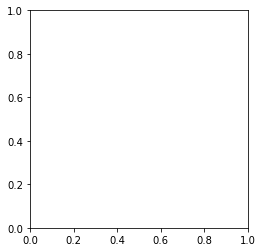

In [59]:
plt.pie(vic_education['Affiliation (Gov/Cath/Ind)'])
plt.show()

In [58]:
vic_education['Affiliation (Gov/Cath/Ind)'].unique()

array(['a Government', 'b Catholic', 'c Independent'], dtype=object)

In [45]:
vic_education.head(25)

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),School Type,School Count
12,2021,b Vic.,a Government,a Government,a Primary school,1137.0
13,2021,b Vic.,a Government,a Government,b Secondary school,247.0
14,2021,b Vic.,a Government,a Government,c Combined school,82.0
15,2021,b Vic.,a Government,a Government,d Special school,81.0
16,2021,b Vic.,b Non-Government,b Catholic,a Primary school,394.0
17,2021,b Vic.,b Non-Government,b Catholic,b Secondary school,84.0
18,2021,b Vic.,b Non-Government,b Catholic,c Combined school,14.0
19,2021,b Vic.,b Non-Government,b Catholic,d Special school,7.0
20,2021,b Vic.,b Non-Government,c Independent,a Primary school,40.0
21,2021,b Vic.,b Non-Government,c Independent,b Secondary school,9.0


In [46]:
vic_education.tail(25)

,Year,State/Territory,Affiliation (Gov/Non-gov),Affiliation (Gov/Cath/Ind),School Type,School Count
868,2012,b Vic.,b Non-Government,c Independent,d Special school,13.0
948,2011,b Vic.,a Government,a Government,a Primary school,1140.0
949,2011,b Vic.,a Government,a Government,b Secondary school,244.0
950,2011,b Vic.,a Government,a Government,c Combined school,76.0
951,2011,b Vic.,a Government,a Government,d Special school,76.0
952,2011,b Vic.,b Non-Government,b Catholic,a Primary school,381.0
953,2011,b Vic.,b Non-Government,b Catholic,b Secondary school,85.0
954,2011,b Vic.,b Non-Government,b Catholic,c Combined school,14.0
955,2011,b Vic.,b Non-Government,b Catholic,d Special school,7.0
956,2011,b Vic.,b Non-Government,c Independent,a Primary school,42.0


In [47]:
years = []

for i in list(range(2010, 2022)):
    years.append(i)
    years.append(i)
    years.append(i)
    i += 1

years.reverse()

In [48]:
affiliations = ['Government', 'Catholic', 'Independent']
school_aff = []
for year in years:
    for affiliation in affiliations:
        school_aff.append(affiliation)
    
school_aff = school_aff[:36]

In [49]:
counts = []
school_counts = vic_education['School Count']

i = 0
for i in len(range(school_counts)):
    total = 0
    total += school_counts[i]
    i += 1
    

TypeError: 'Series' object cannot be interpreted as an integer

In [50]:
test = pd.DataFrame()

In [51]:
test['Year'] = years

## Have change in school (type) distribution over 11 years

- Compare to median house price over the 11 years
- Can establish trend for schooling demographic + forecasting future median house price (based on schools) for 3 years as required
- Could create regression model: y = median house price, X = [# of government, catholic, indept, etc schools]

# The number of schools in Victoria has remained fairly constant over the 11 years

- Explore why

In [52]:
vic_education.groupby(by = 'Year').mean()

,School Count
Year,
2010,187.583333
2011,186.166667
2012,186.083333
2013,184.916667
2014,184.750000
2015,185.250000
2016,185.416667
2017,186.083333
2018,186.500000


# Naive approach - 
## Most liveable suburb == most expensive 

In [53]:
properties = pd.read_csv('../data/curated/2022-09-18 12_34_18.198964.csv')

/tmp/ipykernel_311/348927084.py:1: DtypeWarning: Columns (5,6,7,10,11,16,18,22,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv('../data/curated/2022-09-18 12_34_18.198964.csv')


In [54]:
properties.columns

Index(['link', 'address', 'map_link', 'lat', 'lng', 'sold_price_',
       'sold_date_', 'land_size_', 'property_type', 'Bed rooms_',
       'last_sold_price_', 'last_sold_date_', 'agent', 'rent_price_',
       'rent_date_', 'Bath rooms_', 'Car spaces_', 'page', 'list_text_',
       'source', 'suburb', 'sold_price', 'sold_date', 'land_size',
       'building_size', 'bed', 'bath', 'car', 'rent_price', 'rent_date',
       'last_sold_price', 'last_sold_date', 'list', 'is_over', 'minlist',
       'maxlist'],
      dtype='object')

In [55]:
properties

,link,address,map_link,lat,lng,sold_price_,sold_date_,land_size_,property_type,Bed rooms_,...,bath,car,rent_price,rent_date,last_sold_price,last_sold_date,list,is_over,minlist,maxlist
0,http://house.speakingsame.com/p.php?q=Mentone&...,33 Mundy Street,http://house.speakingsame.com/map.php?addr=33+...,-37.984010,145.056010,"$2,069,999",Sep 2022,719 sqm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://house.speakingsame.com/p.php?q=Mentone&...,2/21-23 Florence Street,http://house.speakingsame.com/map.php?addr=2%2...,-37.982060,145.061010,"$410,000",Sep 2022,56 sqm,Unit,1,...,NaN,NaN,NaN,NaN,410000.0,2022-09-01,NaN,NaN,NaN,NaN
2,http://house.speakingsame.com/p.php?q=Mentone&...,4 Rogers Street,http://house.speakingsame.com/map.php?addr=4+R...,-37.985233,145.068389,"$1,910,000",Sep 2022,853 sqm,House,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://house.speakingsame.com/p.php?q=Mentone&...,1/160 Warrigal Road,http://house.speakingsame.com/map.php?addr=1%2...,-37.978116,145.072367,"$740,000",Sep 2022,341 sqm,Townhouse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://house.speakingsame.com/p.php?q=Mentone&...,1/10 Commercial Road,http://house.speakingsame.com/map.php?addr=1%2...,-37.985533,145.065867,"$595,000",Sep 2022,818 sqm,Apartment,3,...,1.0,1.0,435.0,2018-10-01,595000.0,2022-09-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80647,http://house.speakingsame.com/rp.php?q=St+Andr...,9 BASS MEADOWS BOULEVARD,http://house.speakingsame.com/map.php?addr=9+B...,-38.416080,144.830238,NaN,NaN,NaN,House,4,...,1.0,2.0,380.0,2011-05-01,NaN,NaN,NaN,NaN,NaN,NaN
80648,http://house.speakingsame.com/rp.php?q=St+Andr...,9 Bass Meadows,http://house.speakingsame.com/map.php?addr=9+B...,-38.416080,144.830238,NaN,NaN,NaN,House,4,...,1.0,2.0,380.0,2011-05-01,NaN,NaN,NaN,NaN,NaN,NaN
80649,http://house.speakingsame.com/rp.php?q=St+Andr...,39 Alex Drive,http://house.speakingsame.com/map.php?addr=39+...,-38.418264,144.838224,NaN,NaN,NaN,House,3,...,3.0,2.0,350.0,2009-07-01,NaN,NaN,NaN,NaN,NaN,NaN
80650,http://house.speakingsame.com/rp.php?q=St+Andr...,1 Hadrian Avenue,http://house.speakingsame.com/map.php?addr=1+H...,-38.418423,144.833288,NaN,NaN,NaN,House,3,...,1.0,1.0,245.0,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN


## Finding the most expensive suburbs -

In [56]:
properties.loc[properties['suburb'] == 'Sawmill Settlement']['address']

42251    8 Christensen Street
42252      19A Warrambat Road
42253       26 Rosella Street
42254    Lot 65 Overflow Road
42255        8 Warrambat Road
                 ...         
79032       28 Warrambat Road
79033       35 Warrambat Road
79034        7 Rosella Street
79035         10 Finch Street
79036        6 Warrambat Road
Name: address, Length: 159, dtype: object

In [ ]:
#df = properties[['sold_price', 'suburb']]
test = properties.groupby('suburb').mean().sort_values(by = 'sold_price')
test

In [ ]:
expensive_10 = test[:10].index

In [ ]:
expensive_10

In [ ]:
# Change this when suburb conversion is available

lga = ['Kenebri', ]

In [ ]:
df2.loc[df2['LGA Name']== 'Alpine (S)']

In [ ]:
df2